<a href="https://colab.research.google.com/github/lmmlima/ENV716_EnergyModeling_F2021/blob/main/Lab8/Lab8_GasolineBlending_MultiPeriodLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 8 - Gasoline Blending model in Python**

Learning outcomes for Lab 8:
* Implement teh gasoline blending model using object **Set()** and **Param()**;
* Learn how to implement multi-period LPs.



## Initializing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Installing Pyomo and glpk solver.

In [ ]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

Importing pyomo and solver.

In [ ]:
from pyomo.environ import *
#Import solver
opt=SolverFactory('glpk')

## Exercise 3 from Lab 7 - Gasoline Blending

Recall the gasoline blending example. You need to find how to produce three types of gasoline from three available stocks so that **profits are maximized**.  The blended gasoline must meet minimum octane rating. The amount of each type of gasoline produced cannot exceed demand. It is not possible to use more stocks than what is available. 


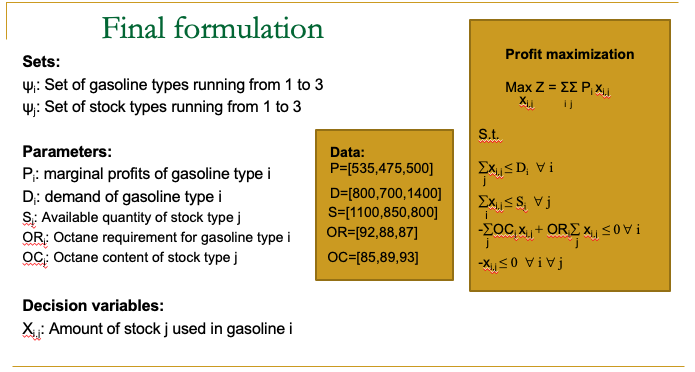

### Defining model, sets, parameters and decision variables

In [ ]:
#Initialize Model
model=ConcreteModel()

#Defining Sets
model.I=Set(initialize=['G1','G2','G3'])  #set of gasoline types running from 1 to 3
model.J=Set(initialize=['SA','SB','SC'])  #set of stock types running from 1 to 3

#Defining Parameters
model.P=Param(model.I,initialize={'G1':535,'G2':475,'G3':500})   #profit margin
model.D=Param(model.I,initialize={'G1':800,'G2':700,'G3':1400})  #forecasted demand
model.S=Param(model.J,initialize={'SA':1100,'SB':850,'SC':800})  #quantity available for each stock
model.OR=Param(model.I,initialize={'G1':92,'G2':88,'G3':87})     #minimum octane rating for each gasoline type
model.OC=Param(model.J,initialize={'SA':85,'SB':89,'SC':93})     #octane rating from stocks

#Add dec variables
model.x=Var(model.I,model.J,domain=NonNegativeReals)

### Defining objective function

Remember we want to maximize profit from gasoline sales.

In [ ]:
#Add obj func
def obj_profit(model):
    return sum(sum(model.P[i]*model.x[i,j] for j in model.J) for i in model.I)
model.profit=Objective(sense=maximize,rule=obj_profit)

#Checking objetive function
print(model.profit.expr)

#Exercise: Change order of i and j inside the sums to see how the order of elements will change

### Adding model constrains
* Market demand: quantity of gasoline produced should be less than or equal to demand

* Stock availability: quantity of stocks used should be less than or equal to the amount available

* Minimum octane rating: octane rating of gasoline should be greater than or equal to minimum octane rating requirement

* Non-negativity constraints: already added when we defined the decison variables


In [ ]:
#Add market demand constraint for all gasoline types
def meet_demand(model,i):
    return ## YOUR CODE ##
model.demand=Constraint(model.I,rule=meet_demand)

#Checking added constraints
for i in model.I:
    print(model.demand[i].expr)


In [ ]:
#Add stock availability constraint
def supply_avail(model,j):
    return sum(model.x[i,j] for i in model.I) <= model.S[j]
model.supply=Constraint(## YOUR CODE ##)

#Checking added constraints
for j in model.J:
    print(model.supply[j].expr)


In [ ]:
#Add octane rating constraint
def ## YOUR CODE ##:
    return ( model.OR[i]*sum(model.x[i,j] for j in model.J) <= sum(model.OC[j]*model.x[i,j] for j in model.J) )
model.rating=Constraint(model.I,rule=rating_conc)

#Checking added constraints
for i in model.I:
    print(model.rating[i].expr)


### Solving the model and reporting results


In [ ]:
#Solve model
opt.solve(model)

#Print results
print("Profit =",model.profit())
for i in model.I:
  for ## YOUR CODE ##:
    print(model.x[i,j],model.x[i,j].value)

## Exercise 2: Multiperiod example




Recall the example from lecture 14. A new company will manufacture 3 products by processing them in 2 different machines. 

Each product can be produced either 
inside the company or outside, at a higher cost. 
The inside production is constrained by the hours available at each machine, while outside production is unlimited. 

The company has sales contracts for the next 4 weeks.

Production that exceeds the sales contracts can be kept in inventories at a cost. 

Find the optimal **production/purchase/inventory strategy**.





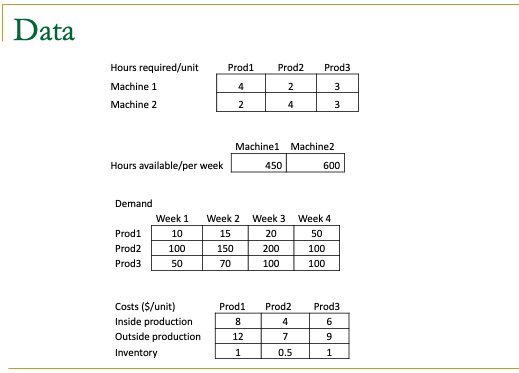

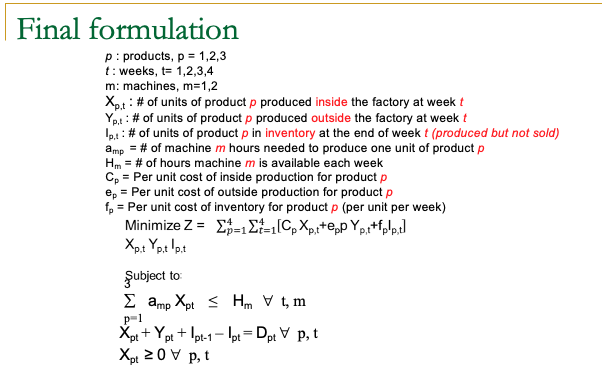

### Defining model, sets, parameters and decision variables

In [ ]:
#using sets and parameter
model=ConcreteModel()

#Sets M,P,T
##YOUR CODE##

#Parameters
##YOUR CODE##

#add dec variables
##YOUR CODE##

### Defining objective function

Remember we want to minimize production cost.

In [ ]:
#add obj func
##YOUR CODE##

#Checking objetive function
print(##YOUR CODE##)

### Adding model constrains

In [ ]:
#add machine availability const
##YOUR CODE##

#Checking added constraints
for m in model.M:
  for t in model.T:
    print(##YOUR CODE##)

In [ ]:
##YOUR CODE##

#Checking added constraints
for p in model.P:
  for t in model.T:
    print(##YOUR CODE##)

### Solving the model and reporting results


In [ ]:
#Solve model
opt.solve(model)

#Print results
print("Cost =",model.cost())
print("Decision Variables")
for p in model.P:
  for t in model.T:
    ##YOUR CODE##